In [76]:
#METHOD 1:
xarray = [1,2,3,4,5,6,7,8,9,10]
print(xarray)

# Prepare a variable to store the sum
mysum=0

# Loop over indices
for i in range(len(xarray)):
    mysum = mysum + xarray[i]

print(mysum)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
55


In [14]:
#METHOD 2:
xarray = [1,2,3,4,5,6,7,8,9,10]
print(xarray)

# Prepare a variable to store the sum
mysum=0

# Loop over values
def func():
    mysum = 0
    for x in xarray: mysum = mysum + x

print(mysum)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
0


In [5]:
#METHOD 3:
import numpy as np
xarray = [1,2,3,4,5,6,7,8,9,10]
print(xarray)

mysum = np.sum( xarray )

print(mysum)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
55


In [87]:
#SAMPLE LEFTPOINT
import numpy as np

# Hint: for development/debugging,
# you may want to pick a set of $x_i$ that you know.  Print them to the screen to ensure
# you know that x-axis is correct. For example, a=1, b=2, N = 10.

a = 0
b = np.pi/2
N = 1000

def leftpoint(f,a,b,N):
    h   = (b - a) / N #So x_n = a + n*h for some integer n
    mysum = 0
    n = 0
    while n < N:
        mysum += f(a + n*h)*h
        n += 1
    return mysum   # Note that we need this to tell the code outside of the function about the result
    
N = 1000
result=leftpoint(np.sin,0,np.pi/2,N)
print("The result of the integral for", N,"intervals is", result)

The result of the integral for 1000 intervals is 0.9992143962198362


Now I will do homework 3.1 below, with steps labeled at the top:

In [213]:
#part a)
%reset -f
import pylab as py
import numpy as np

a = 0
b = np.pi/2
N = 3392

def midpoint(f,a,b,N):
    h   = (b - a) / N #So x_n = a + n*h for some integer n
    mysum = 0
    n = 0
    while n < N:
        mysum += f(a + (n + 0.5) * h) * h
        n += 1
    return mysum
    
N = 1000
result=midpoint(np.sin,0,np.pi/2,N)
print(f"The result of the integral for {N} intervals is {result}")

The result of the integral for 1000 intervals is 1.0000001028083867


SLOPE = -2.003711486063887


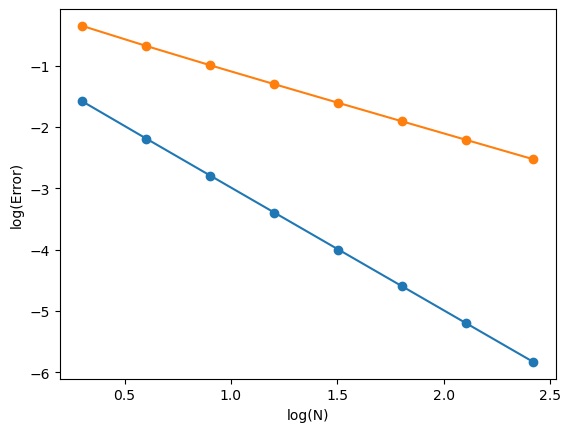

SLOPE = -2.003711486063887


In [193]:
#parts b) and d)
import pylab as py
import numpy as np

a = 0
b = np.pi/2
N_arr = [2,4,8,16,32,64,128,264]

def midpoint(f,a,b,N):
    h   = (b - a) / N #So x_n = a + n*h for some integer n
    mysum = 0
    n = 0
    while n < N:
        mysum += f(a + (n + 0.5) * h) * h
        n += 1
    return mysum

def leftpoint(f,a,b,N):
    h   = (b - a) / N #So x_n = a + n*h for some integer n
    mysum = 0
    n = 0
    while n < N:
        mysum += f(a + n*h)*h
        n += 1
    return mysum

#First, do midpoint integral approximation

result_arr = np.zeros([8])

for i, N in enumerate(N_arr):
    result_arr[i] = midpoint(np.sin,a,b,N_arr[i])

#Now, log-log midpoint and display it with its slope

x = np.zeros([8])
yM = np.zeros([8])

for i, N in enumerate(N_arr):
    x[i] = np.log10(N_arr[i])
    yM[i] = np.log10(np.abs(1 - result_arr[i]))

py.plot(x, yM,'o-')
slope = (y[7] - y[0]) / (x[7] - x[0])
print(f"SLOPE = {slope}")

#Now, do it again with leftpoint

result_arr = np.zeros([8])

for i, N in enumerate(N_arr):
    result_arr[i] = leftpoint(np.sin, a, b, N_arr[i])

yL = np.zeros([8])

for i, N in enumerate(N_arr):
    yL[i] = np.log10(np.abs(1 - result_arr[i]))

py.plot(x, yL,'-o')
py.xlabel('log(N)')
py.ylabel('log(Error)')
py.show()
slope = (y[7] - y[0]) / (x[7] - x[0])
print(f"SLOPE = {slope}")

part c) : Since log(Error) = -2*log(N) = log(1/(N^2)) for midpoint, 
it is clear that the error is inversely proportional to N squared

part e) : Since the slope for leftpoint is a less negative number, for N > 1 (which logically must be the case)
leftpoint is less effective, since its error is larger (smaller power of N in the denominator makes larger error).
For larger N, this difference in power of N is very significant.

Now I will do the homework for 3.2 below:

In [276]:
#part a)
%reset -f

import pylab as py
import numpy as np

a = 0
b = 100
N = 195000

def midpoint(f,a,b,N):
    h   = (b - a) / N
    mysum = 0
    n = 0
    while n < N:
        xn = a + n * h
        mysum += f(pow(xn, 2) + xn * h + pow(h, 2) / 4) * h
        n += 1
    return mysum
    
result = midpoint(np.sin, a, b, N)

print(result)

0.631420009194518


The true answer (to at least 18 sig-figs) is 0.63141792186693373360 according to Maple, so this is kinda close

In [31]:
#part b)
%reset -f

import pylab as py
import numpy as np
import pandas as pd

a = 0
b = 100
N = 1
N_Max = 10000
Chart_Div = 1000
N_arr = np.zeros([N_Max])

for i, n in enumerate(N_arr):
    N_arr[i] = N
    N += 1

def midpoint(f,a,b,N):
    h   = (b - a) / N
    mysum = 0
    n = 0
    while n < N:
        xn = a + n * h
        mysum += f(pow(xn, 2) + xn * h + pow(h, 2) / 4) * h
        n += 1
    return mysum

result_arr = np.zeros([N_Max])

for i, n in enumerate(N_arr):
    result_arr[i] = midpoint(np.sin, a, b, N_arr[i])
        
""" DOES FULL TABLE
df = pd.DataFrame({'N': N_arr, 'I': result_arr})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)
"""

i = 1
print (f"  N                 I")
while i <= N_Max / Chart_Div:
    print(N_arr[int(Chart_Div * i - 1)], "   ", result_arr[int(Chart_Div * i - 1)])
    i += 1


  N                 I
1000.0     -2.587284263475512
2000.0     2.2638817523185653
3000.0     -0.42256416590552587
4000.0     0.6465488199497526
5000.0     0.6371288752099554
6000.0     0.6346284818234188
7000.0     0.63352766622238
8000.0     0.6329280471120348
9000.0     0.6325596307367137
10000.0     0.6323148353521281


By observing the above table, I can see clearly that at N = 3392, the integral approximation (I) reaches 1st sig-fig 
precision. The table also includes when I reaches 2nd sig-fig precision at N = 4496, but to go further than that I have 
thought to do the code below that will find the nth sig-fig precision based on the observation that I continues to decrease 
from the 1st sig-fig precision point onwards.

In [277]:
#part c)
%reset -f

import pylab as py
import numpy as np

a = 0
b = 100
N = 195000
result = 0.63142

while result >= 0.63142:
    
    def midpoint(f,a,b,N):
        h   = (b - a) / N
        mysum = 0
        n = 0
        while n < N:
            xn = a + n * h
            mysum += f(pow(xn, 2) + xn * h + pow(h, 2) / 4) * h
            n += 1
            #if mysum < 0.632:
            #    break
                        
        return mysum
        
    result= midpoint(np.sin, a, b, N)
    if int(N / 200) == N / 200: 
        print(N, result)
    N += 1

print(N - 1, result)

195000 0.631420009194518
195200 0.6314200049180951
195400 0.6314200006548049
195431 0.631419999995218


By guessing around using part a), I have found the starting point for the code above and used this to find the following:
3rd is N = 12162, 4th is N = 31279, and 5th is N = 195431